In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # Plots
import matplotlib.pyplot as plt # Plots

In [2]:
train_data = pd.read_csv('./mymoviedb.csv', engine='python')

In [3]:
print("Hello World")

Hello World


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [5]:
train_data.shape

(9837, 9)

In [6]:
column_types = {'Title':'string', 'Overview':'string', 'Original_Language':'string', 'Genre':'string'}

train_data_clean = pd.read_csv('./mymoviedb.csv', engine='python', dtype=column_types)

In [7]:
train_data_clean = train_data_clean.dropna()
train_data_clean['Vote_Count'] = train_data_clean['Vote_Count'].astype(int)
train_data_clean['Popularity'] = train_data_clean['Popularity'].astype(int)
train_data_clean['Vote_Average'] = train_data_clean['Vote_Average'].astype(float)
train_data_clean['Release_Date'] = pd.to_datetime(train_data_clean['Release_Date'])

In [8]:
train_data_clean = train_data_clean.drop(columns=['Poster_Url','Overview'])

In [9]:
train_data_clean.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,Spider-Man: No Way Home,5083,8940,8.3,en,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827,1151,8.1,en,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618,122,6.3,en,Thriller
3,2021-11-24,Encanto,2402,5076,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895,1793,7.0,en,"Action, Adventure, Thriller, War"


In [10]:
train_data_clean.shape

(9826, 7)

In [11]:
train_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9826 non-null   datetime64[ns]
 1   Title              9826 non-null   string        
 2   Popularity         9826 non-null   int32         
 3   Vote_Count         9826 non-null   int32         
 4   Vote_Average       9826 non-null   float64       
 5   Original_Language  9826 non-null   string        
 6   Genre              9826 non-null   string        
dtypes: datetime64[ns](1), float64(1), int32(2), string(3)
memory usage: 537.4 KB


In [12]:
print(train_data_clean.isnull().sum())

Release_Date         0
Title                0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
dtype: int64


In [13]:
train_data_clean.describe(include='all')

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
count,9826,9826,9826.000000,9826.000000,9826.000000,9826,9826
unique,NaN,9512,NaN,NaN,NaN,43,2337
top,NaN,Alice in Wonderland,NaN,NaN,NaN,en,Drama
freq,NaN,4,NaN,NaN,NaN,7569,466
mean,2006-09-23 04:47:14.276409600,NaN,39.828007,1392.943721,6.439467,NaN,NaN
min,1902-04-17 00:00:00,NaN,13.000000,0.000000,0.000000,NaN,NaN
25%,2000-10-17 12:00:00,NaN,16.000000,146.000000,5.900000,NaN,NaN
50%,2011-09-12 00:00:00,NaN,21.000000,444.000000,6.500000,NaN,NaN
75%,2017-11-22 00:00:00,NaN,35.000000,1376.000000,7.100000,NaN,NaN
max,2024-07-03 00:00:00,NaN,5083.000000,31077.000000,10.000000,NaN,NaN


In [14]:
train_data_clean.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9826,9826.000000,9826.000000,9826.000000
mean,2006-09-23 04:47:14.276409600,39.828007,1392.943721,6.439467
min,1902-04-17 00:00:00,13.000000,0.000000,0.000000
25%,2000-10-17 12:00:00,16.000000,146.000000,5.900000
50%,2011-09-12 00:00:00,21.000000,444.000000,6.500000
75%,2017-11-22 00:00:00,35.000000,1376.000000,7.100000
max,2024-07-03 00:00:00,5083.000000,31077.000000,10.000000
std,NaN,108.879786,2611.303856,1.129797


In [15]:
train_data_clean_numeric=train_data_clean.select_dtypes(include=['number'])

In [16]:
train_data_clean_numeric.head()

,Popularity,Vote_Count,Vote_Average
0,5083,8940,8.3
1,3827,1151,8.1
2,2618,122,6.3
3,2402,5076,7.7
4,1895,1793,7.0


# Welche Orignalsprache haben die Filme im Datensatz

In [17]:
np.unique(train_data_clean['Original_Language'])

array(['ar', 'bn', 'ca', 'cn', 'cs', 'da', 'de', 'el', 'en', 'es', 'et',
       'eu', 'fa', 'fi', 'fr', 'he', 'hi', 'hu', 'id', 'is', 'it', 'ja',
       'ko', 'la', 'lv', 'ml', 'ms', 'nb', 'nl', 'no', 'pl', 'pt', 'ro',
       'ru', 'sr', 'sv', 'ta', 'te', 'th', 'tl', 'tr', 'uk', 'zh'],
      dtype=object)

# Genres aufgeteilt und Popularity addiert

In [18]:
genre_popularity = {}

# Durchlaufen jeder Zeile im Datensatz
for i, row in train_data_clean.iterrows():
    #'Genre' string nach jedem Komma aufteilen
    genres = row['Genre'].replace(" ", "").split(",")
    # popularity in int casten(wir runden)
    popularity = int(round(row["Popularity"]))
    
    # popularity der Filme mit dem gleichen Genre wird aufsummiert
    for genre in genres:
        if genre in genre_popularity:
            genre_popularity[genre] += popularity
        else:
            genre_popularity[genre] = popularity

# Sortiere: absteigend
sorted_genres = sorted(genre_popularity.items(), key=lambda x: x[1], reverse=True)

for genre, popularity in sorted_genres:
    print(f"{genre}: {popularity}")

Action: 135363
Comedy: 113299
Drama: 110739
Thriller: 105612
Adventure: 98687
Animation: 74686
Fantasy: 68794
Family: 65208
ScienceFiction: 62398
Horror: 55500
Crime: 54965
Romance: 44818
Mystery: 30603
History: 11914
War: 10724
Music: 9809
TVMovie: 6303
Documentary: 6177
Western: 4886


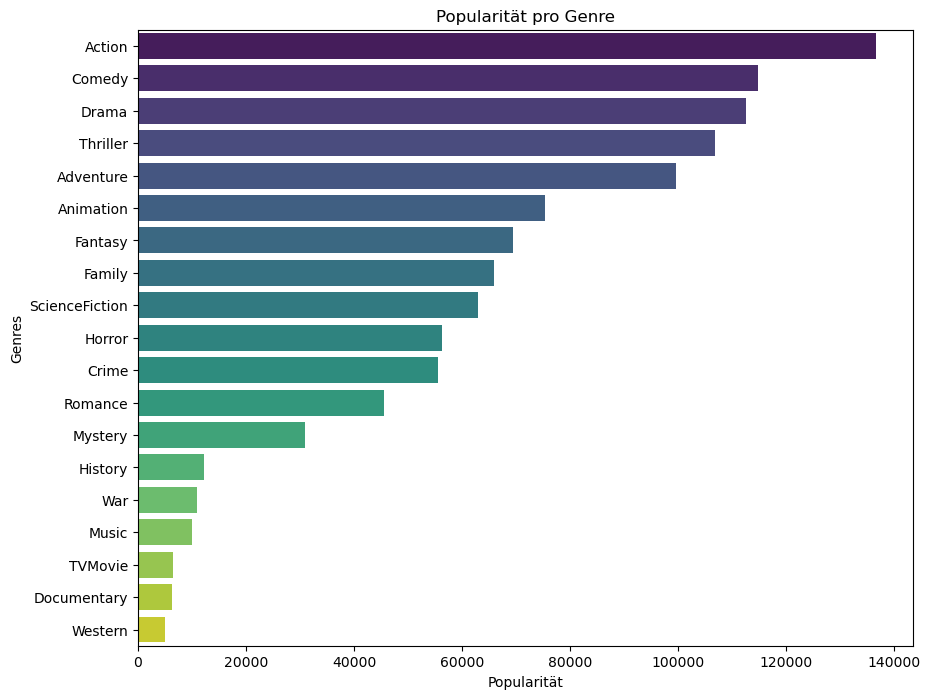

In [19]:
import seaborn as sns

genre_popularity = {"Action": 136663, "Comedy": 114795, "Drama": 112622, "Thriller": 106822, 
                    "Adventure": 99560, "Animation": 75392, "Fantasy": 69425, "Family": 65918, 
                    "ScienceFiction": 63019, "Horror": 56248, "Crime": 55567, "Romance": 45583, 
                    "Mystery": 30995, "History": 12136, "War": 10871, "Music": 9968, 
                    "TVMovie": 6410, "Documentary": 6288, "Western": 4960}

genres = list(genre_popularity.keys())
popularity = list(genre_popularity.values())

# Bar-Chart
plt.figure(figsize=(10, 8))
sns.barplot(x=popularity, y=genres, palette='viridis')
plt.xlabel('Popularität')
plt.ylabel('Genres')
plt.title('Popularität pro Genre')
plt.show()

# Anzahl der Filme in den jeweiligen Genres

In [20]:
genre_counts = train_data_clean['Genre'].str.split(', ').explode().value_counts()

print(genre_counts)

Genre
Drama              3744
Comedy             3031
Action             2686
Thriller           2488
Adventure          1853
Romance            1476
Horror             1470
Animation          1438
Family             1414
Fantasy            1308
Science Fiction    1273
Crime              1242
Mystery             773
History             427
War                 308
Music               295
Documentary         215
TV Movie            214
Western             137
Name: count, dtype: int64


## Absolutwerte nicht wirklich aussagekräftig, da sich die Anzahl der vertretenen Genres stark unterscheidet

# Durchschnittliche Beliebtheit für jedes Genre

In [21]:
genre_popularity = {}
genre_counts = {}

for i, row in train_data_clean.iterrows():
    genres = row['Genre'].split(', ')
    
    for genre in genres:
        if genre in genre_popularity:
            genre_popularity[genre] += row['Popularity']
            genre_counts[genre] += 1
        else:
            genre_popularity[genre] = row['Popularity']
            genre_counts[genre] = 1

# durchschnittliche popularity für jedes Genre
average_popularity = {genre: genre_popularity[genre] / genre_counts[genre] for genre in genre_popularity}

# Sortieren nach absteigender Reihenfolge
sorted_genres = sorted(average_popularity.items(), key=lambda x: x[1], reverse=True)

for genre, popularity in sorted_genres:
    print(f"{genre}: {popularity}")

Adventure: 53.25796006475985
Fantasy: 52.59480122324159
Animation: 51.93741307371349
Action: 50.395755770662696
Science Fiction: 49.016496465043204
Family: 46.11598302687412
Crime: 44.25523349436393
Thriller: 42.448553054662376
Mystery: 39.589909443725745
Horror: 37.755102040816325
Comedy: 37.38007258330584
Western: 35.66423357664234
War: 34.81818181818182
Music: 33.25084745762712
Romance: 30.36449864498645
Drama: 29.577724358974358
TV Movie: 29.453271028037385
Documentary: 28.730232558139534
History: 27.901639344262296


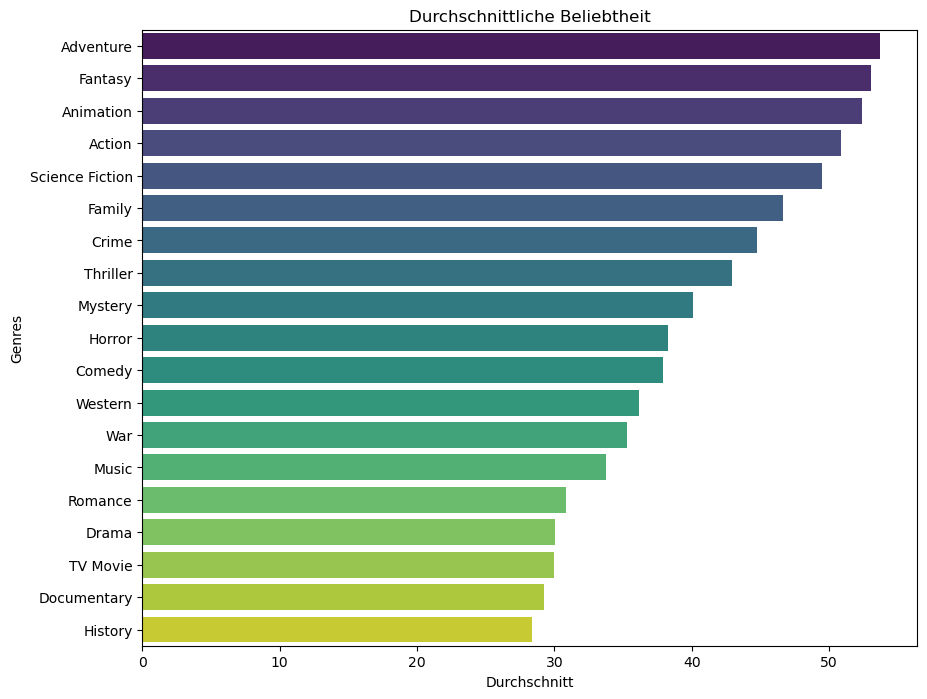

In [22]:
genres = ['Adventure', 'Fantasy', 'Animation', 'Action', 'Science Fiction', 'Family', 'Crime', 'Thriller', 'Mystery',
          'Horror', 'Comedy', 'Western', 'War', 'Music', 'Romance', 'Drama', 'TV Movie', 'Documentary', 'History']
values = [53.74288828926054, 53.08134174311917, 52.4276627260084, 50.890132911392364, 49.511333857030685, 46.6106159830269,
          44.74729549114323, 42.94625763665597, 40.09358990944373, 38.26449795918362, 37.87366875618602, 36.187912408759125,
          35.29807467532467, 33.77141016949153, 30.86603048780494, 30.077651442307708,
          29.954714953271036,29.235376744186063, 28.3958266978923]

# Bar-Chart
plt.figure(figsize=(10, 8))
sns.barplot(x=values, y=genres, palette='viridis')
plt.xlabel('Durchschnitt')
plt.ylabel('Genres')
plt.title('Durchschnittliche Beliebtheit')
plt.show()

### Die Frage “Was schaut die Welt am liebsten?” bezieht sich in der Regel auf das Genre, das die meisten Zuschauer oder die höchste Gesamtpopularität hat. Es geht darum, welches Genre insgesamt am meisten gesehen wird.

### Die “durchschnittliche Beliebtheit” eines Genres hingegen bezieht sich auf die durchschnittliche Beliebtheit der Filme innerhalb dieses Genres. Es ist möglich, dass ein Genre nur wenige, aber sehr beliebte Filme hat und daher eine hohe durchschnittliche Beliebtheit hat. Es ist aber auch möglich, dass ein Genre viele Filme hat, die nicht so beliebt sind, und daher eine niedrigere durchschnittliche Beliebtheit hat, obwohl es insgesamt mehr gesehen wird.

# Median

In [23]:
genre_popularity_medians = train_data_clean.assign(Genre=train_data_clean['Genre'].str.split(', ')).explode('Genre').groupby('Genre')['Popularity'].median()

print(genre_popularity_medians)

Genre
Action             24.0
Adventure          25.0
Animation          27.0
Comedy             20.0
Crime              19.0
Documentary        19.0
Drama              19.0
Family             24.0
Fantasy            25.5
History            19.0
Horror             21.0
Music              18.0
Mystery            20.0
Romance            19.0
Science Fiction    24.0
TV Movie           18.0
Thriller           21.0
War                19.0
Western            18.0
Name: Popularity, dtype: float64


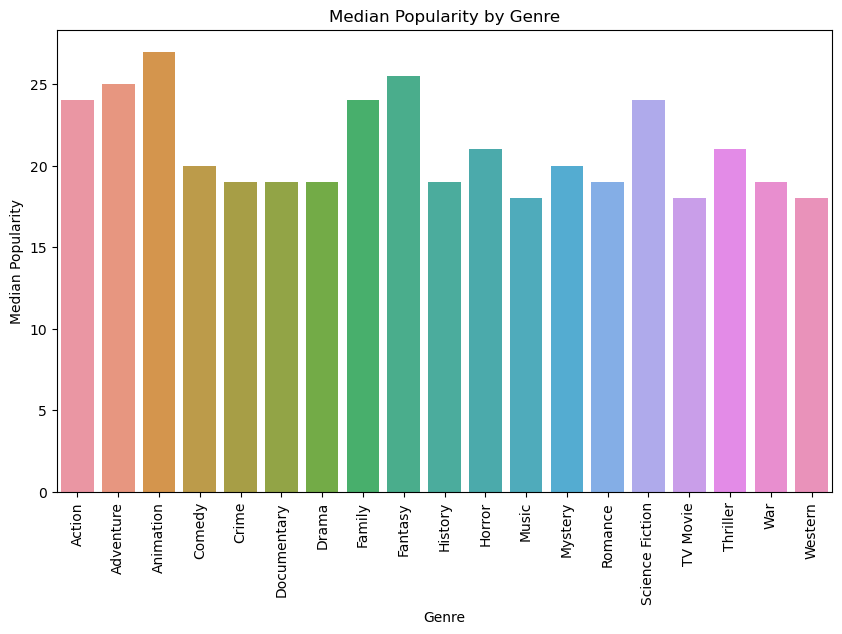

In [24]:
genre_popularity_medians = train_data_clean.assign(Genre=train_data_clean['Genre'].str.split(', ')).explode('Genre').groupby('Genre')['Popularity'].median()

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_popularity_medians.index, y=genre_popularity_medians.values)
plt.xlabel('Genre')
plt.ylabel('Median Popularity')
plt.title('Median Popularity by Genre')
plt.xticks(rotation=90)
plt.show()

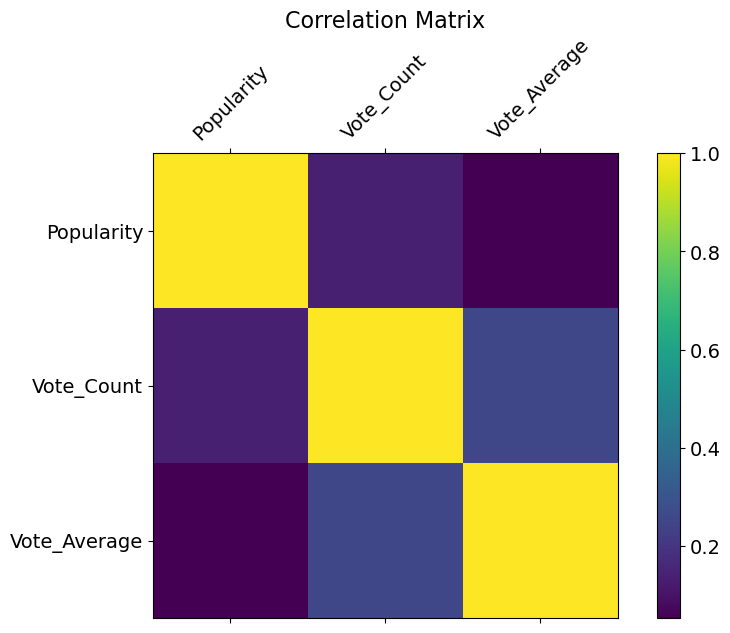

In [25]:
plt.figure(figsize=(10, 6))
numeric_data = train_data_clean.select_dtypes(include=['float64', 'int32'])
plt.matshow(numeric_data.corr(), fignum=plt.gcf().number)
plt.xticks(range(numeric_data.shape[1]), numeric_data.columns, fontsize=14, rotation=45)
plt.yticks(range(numeric_data.shape[1]), numeric_data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

# Beziehung zwischen Beliebtheit und Bewertung

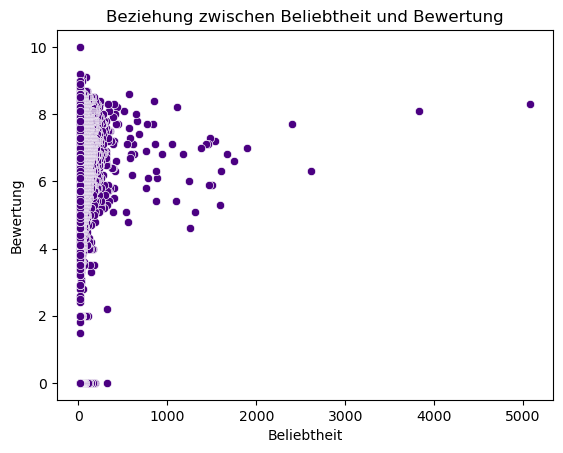

In [26]:
import matplotlib.pyplot as plt

sns.scatterplot(x='Popularity', y='Vote_Average', data=train_data_clean, color='indigo')

plt.title('Beziehung zwischen Beliebtheit und Bewertung')
plt.xlabel('Beliebtheit')
plt.ylabel('Bewertung')

plt.show()

# Disney Datensatz

In [27]:
disney_data = pd.read_csv('./disney_plus_titles.csv', engine='python')

In [28]:
disney_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [29]:
disney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [30]:
disney_data = disney_data.dropna()

In [31]:
column_types_disney = {'title':'string', 'type':'string', 'cast':'string' , 'listed_in':'string'}

disney_data = pd.read_csv('./disney_plus_titles.csv', engine='python', dtype=column_types_disney)
disney_data = disney_data.drop(columns=['show_id', 'director', 'country', 'duration', 'description', 'date_added' , 'rating'])

In [32]:
disney_data['release_year'] = pd.to_datetime(disney_data['release_year'], format = '%Y')

In [33]:
disney_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          1450 non-null   string        
 1   title         1450 non-null   string        
 2   cast          1260 non-null   string        
 3   release_year  1450 non-null   datetime64[ns]
 4   listed_in     1450 non-null   string        
dtypes: datetime64[ns](1), string(4)
memory usage: 56.8 KB


In [34]:
disney_data.head()

,type,title,cast,release_year,listed_in
0,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Chris Diamantopoulos, Tony Anselmo, Tress MacN...",2016-01-01,"Animation, Family"
1,Movie,Ernest Saves Christmas,"Jim Varney, Noelle Parker, Douglas Seale",1988-01-01,Comedy
2,Movie,Ice Age: A Mammoth Christmas,"Raymond Albert Romano, John Leguizamo, Denis L...",2011-01-01,"Animation, Comedy, Family"
3,Movie,The Queen Family Singalong,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",2021-01-01,Musical
4,TV Show,The Beatles: Get Back,"John Lennon, Paul McCartney, George Harrison, ...",2021-01-01,"Docuseries, Historical, Music"


In [35]:
np.unique(disney_data['type'])

array(['Movie', 'TV Show'], dtype=object)

In [36]:
disney_data = disney_data[disney_data['type'] != 'TV Show']

In [37]:
# Erstellen Sie einen neuen DataFrame, der nur die gemeinsamen Titel enthält
disney_common_titles = pd.merge(disney_data, train_data_clean, how='inner', left_on='title', right_on='Title')

# Behalten Sie nur die benötigten Spalten
disney_common_titles = disney_common_titles[['title', 'type', 'cast', 'release_year', 'listed_in', 'Popularity', 'Vote_Count', 'Vote_Average', 'Original_Language', 'Genre']]

In [38]:
disney_common_titles.head()

,title,type,cast,release_year,listed_in,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,Ice Age: A Mammoth Christmas,Movie,"Raymond Albert Romano, John Leguizamo, Denis L...",2011-01-01,"Animation, Comedy, Family",37,508,6.4,en,"Animation, Family, TV Movie"
1,Ciao Alberto,Movie,"Jack Dylan Grazer, Marco Barricelli",2021-01-01,"Animation, Comedy, Family",261,412,7.5,en,"Animation, Comedy, Family, Fantasy"
2,Enchanted,Movie,"Amy Adams, Patrick Dempsey, James Marsden, Tim...",2007-01-01,"Comedy, Family, Fantasy",54,4515,6.8,en,"Comedy, Family, Fantasy, Romance"
3,Frozen Fever,Movie,"Kristen Bell, Idina Menzel, Jonathan Groff, Jo...",2015-01-01,"Animation, Family, Fantasy",60,1602,6.8,en,"Animation, Family, Adventure, Comedy"
4,Home Sweet Home Alone,Movie,"Ellie Kemper, Rob Delaney, Archie Yates, Aisli...",2021-01-01,"Comedy, Family",143,375,5.2,en,"Family, Comedy"


In [39]:
disney_common_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              424 non-null    string        
 1   type               424 non-null    string        
 2   cast               418 non-null    string        
 3   release_year       424 non-null    datetime64[ns]
 4   listed_in          424 non-null    string        
 5   Popularity         424 non-null    int32         
 6   Vote_Count         424 non-null    int32         
 7   Vote_Average       424 non-null    float64       
 8   Original_Language  424 non-null    string        
 9   Genre              424 non-null    string        
dtypes: datetime64[ns](1), float64(1), int32(2), string(6)
memory usage: 29.9 KB


In [40]:
disney_common_titles.shape

(424, 10)

# Anzahl der Top 25% der populärsten Filme, die in verschiedenen Genres vertreten sind = 245

In [41]:
# Teilen Sie die 'listed_in' Spalte in einzelne Genres auf
disney_common_titles['genres'] = disney_common_titles['listed_in'].str.split(', ')

# Expandieren Sie die Liste der Genres in separate Zeilen
disney_expanded = disney_common_titles.explode('genres')

# Sortieren Sie die Filme nach Popularität
disney_sorted = disney_expanded.sort_values('Popularity', ascending=False)

# Wählen Sie die Top 25% der Filme aus
top_25_percent = disney_sorted.head(int(len(disney_sorted) * 0.25))

# Zählen Sie die Anzahl der Filme in jedem Genre
genre_counts = top_25_percent['genres'].value_counts()

# Anzeigen der Ergebnisse
print(genre_counts)

genres
Animation           67
Action-Adventure    58
Family              57
Comedy              39
Fantasy             32
Coming of Age       14
Drama                8
Buddy                7
Science Fiction      6
Musical              4
Kids                 3
Crime                2
Romance              2
Spy/Espionage        1
Biographical         1
Romantic Comedy      1
Name: count, dtype: int64


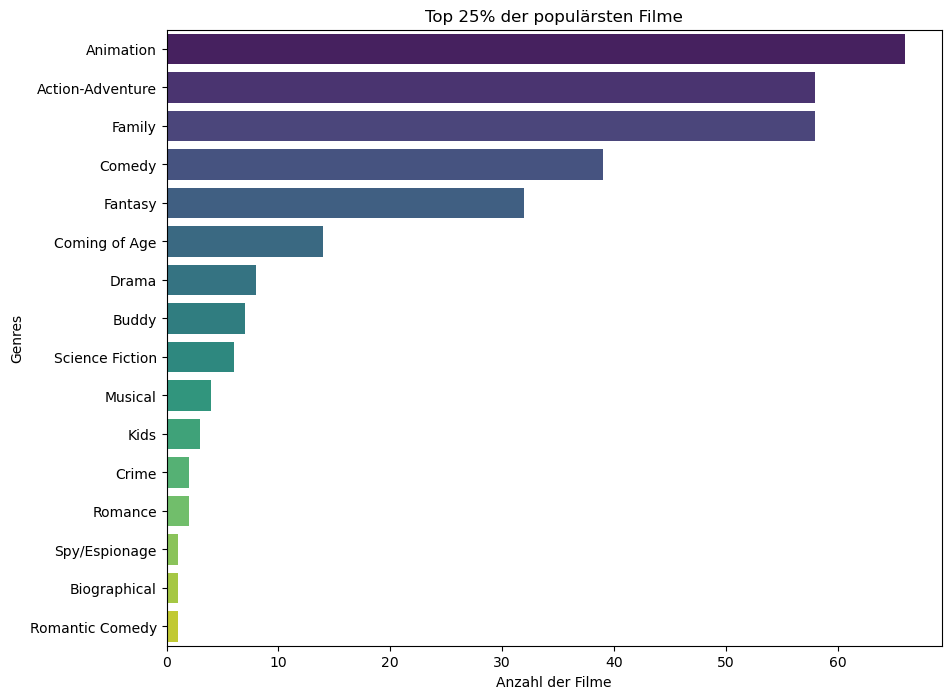

In [42]:
genre_counts = {"Animation": 66, "Action-Adventure": 58, "Family": 58, "Comedy": 39, 
                "Fantasy": 32, "Coming of Age": 14, "Drama": 8, "Buddy": 7, 
                "Science Fiction": 6, "Musical": 4, "Kids": 3, "Crime": 2, 
                "Romance": 2, "Spy/Espionage": 1, "Biographical": 1, "Romantic Comedy": 1}

# Erstellen Sie eine Liste von Genres und deren Zählungen
genres = list(genre_counts.keys())
counts = list(genre_counts.values())

# Erstellen Sie eine Bar-Chart
plt.figure(figsize=(10, 8))
sns.barplot(x=counts, y=genres, palette='viridis')
plt.xlabel('Anzahl der Filme')
plt.ylabel('Genres')
plt.title('Top 25% der populärsten Filme')
plt.show()

# Amazon Prime Datensatz

In [43]:
amazon_data = pd.read_csv('./amazon_prime_titles.csv', engine='python')

In [44]:
disney_data.head()

,type,title,cast,release_year,listed_in
0,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Chris Diamantopoulos, Tony Anselmo, Tress MacN...",2016-01-01,"Animation, Family"
1,Movie,Ernest Saves Christmas,"Jim Varney, Noelle Parker, Douglas Seale",1988-01-01,Comedy
2,Movie,Ice Age: A Mammoth Christmas,"Raymond Albert Romano, John Leguizamo, Denis L...",2011-01-01,"Animation, Comedy, Family"
3,Movie,The Queen Family Singalong,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",2021-01-01,Musical
5,Movie,Becoming Cousteau,"Jacques Yves Cousteau, Vincent Cassel",2021-01-01,"Biographical, Documentary"


In [45]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [46]:
amazon_data = amazon_data.dropna()

In [47]:
column_types_amazon = {'title':'string', 'type':'string', 'cast':'string' , 'listed_in':'string'}

amazon_data = pd.read_csv('./amazon_prime_titles.csv', engine='python', dtype=column_types_amazon)
amazon_data = amazon_data.drop(columns=['show_id', 'director', 'country', 'duration', 'description', 'date_added' , 'rating'])

In [48]:
amazon_data['release_year'] = pd.to_datetime(amazon_data['release_year'], format = '%Y')

In [49]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          9668 non-null   string        
 1   title         9668 non-null   string        
 2   cast          8435 non-null   string        
 3   release_year  9668 non-null   datetime64[ns]
 4   listed_in     9668 non-null   string        
dtypes: datetime64[ns](1), string(4)
memory usage: 377.8 KB


In [50]:
amazon_data.head()

,type,title,cast,release_year,listed_in
0,Movie,The Grand Seduction,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",2014-01-01,"Comedy, Drama"
1,Movie,Take Care Good Night,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018-01-01,"Drama, International"
2,Movie,Secrets of Deception,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",2017-01-01,"Action, Drama, Suspense"
3,Movie,Pink: Staying True,"Interviews with: Pink, Adele, Beyoncé, Britney...",2014-01-01,Documentary
4,Movie,Monster Maker,"Harry Dean Stanton, Kieran O'Brien, George Cos...",1989-01-01,"Drama, Fantasy"


In [51]:
np.unique(amazon_data['type'])

array(['Movie', 'TV Show'], dtype=object)

In [52]:
amazon_data = amazon_data[amazon_data['type'] != 'TV Show']

In [53]:
amazon_common_titles = pd.merge(amazon_data, train_data_clean, how='inner', left_on='title', right_on='Title')

# Behalten Sie nur die benötigten Spalten
amazon_common_titles = amazon_common_titles[['title', 'type', 'cast', 'release_year', 'listed_in', 'Popularity', 'Vote_Count', 'Vote_Average', 'Original_Language', 'Genre']]

In [54]:
amazon_common_titles.head()

,title,type,cast,release_year,listed_in,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,Where Hands Touch,Movie,"Amandla Stenberg, George McKay, Abbie Cornish",2019-01-01,"Drama, Young Adult Audience",14,420,8.1,en,"War, Drama, Romance"
1,We Need to Talk About Kevin,Movie,"Tilda Swinton, John C. Reilly, Ezra Miller",2012-01-01,"Drama, Horror, Suspense",17,2178,7.6,en,"Drama, Thriller"
2,War of Likes,Movie,"Ludwika Paleta, Regina Blandón, Manolo Cardona...",2021-01-01,Comedy,53,224,7.8,es,Comedy
3,Virus,Movie,"Revathy, Kunchako Boban, Parvathy Thiruvoth",2019-01-01,"Drama, Science Fiction, Suspense",14,442,5.3,en,"Horror, Action, Science Fiction"
4,Underdogs,Movie,"D. B. Sweeney, Logan Huffman, Charlie Carver, ...",2013-01-01,Sports,43,340,6.5,es,"Animation, Adventure, Romance"


In [55]:
amazon_common_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              681 non-null    string        
 1   type               681 non-null    string        
 2   cast               669 non-null    string        
 3   release_year       681 non-null    datetime64[ns]
 4   listed_in          681 non-null    string        
 5   Popularity         681 non-null    int32         
 6   Vote_Count         681 non-null    int32         
 7   Vote_Average       681 non-null    float64       
 8   Original_Language  681 non-null    string        
 9   Genre              681 non-null    string        
dtypes: datetime64[ns](1), float64(1), int32(2), string(6)
memory usage: 48.0 KB


In [56]:
amazon_common_titles.shape

(681, 10)

# Anzahl der Top 25% der populärsten Filme, die in verschiedenen Genres vertreten sind = 377

In [57]:
# Teilen Sie die 'listed_in' Spalte in einzelne Genres auf
amazon_common_titles['genres'] = amazon_common_titles['listed_in'].str.split(', ')

# Expandieren Sie die Liste der Genres in separate Zeilen
amazon_expanded = amazon_common_titles.explode('genres')

# Sortieren Sie die Filme nach Popularität
amazon_sorted = amazon_expanded.sort_values('Popularity', ascending=False)

# Wählen Sie die Top 25% der Filme aus
top_25_percent = amazon_sorted.head(int(len(amazon_sorted) * 0.25))

# Zählen Sie die Anzahl der Filme in jedem Genre
genre_counts = top_25_percent['genres'].value_counts()

# Anzeigen der Ergebnisse
print(genre_counts)

genres
Drama                   69
Action                  60
Suspense                57
Comedy                  37
Horror                  28
Science Fiction         19
Kids                    13
Adventure                8
Romance                  7
Fantasy                  6
Sports                   5
Animation                5
International            3
Documentary              3
Young Adult Audience     3
and Culture              3
Arts                     3
Entertainment            3
Special Interest         2
Arthouse                 1
Military and War         1
LGBTQ                    1
Name: count, dtype: int64


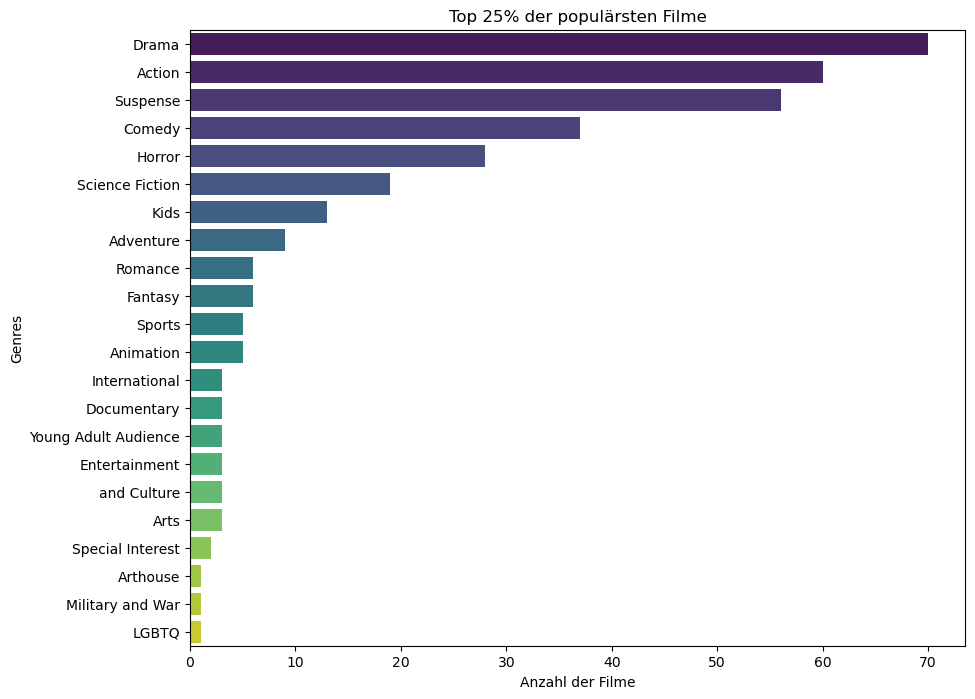

In [58]:
import seaborn as sns

# Ihre Genre-Zählungen
genre_counts = {"Drama": 70, "Action": 60, "Suspense": 56, "Comedy": 37, "Horror": 28, 
                "Science Fiction": 19, "Kids": 13, "Adventure": 9, "Romance": 6, 
                "Fantasy": 6, "Sports": 5, "Animation": 5, "International": 3, 
                "Documentary": 3, "Young Adult Audience": 3, "Entertainment": 3, 
                "and Culture": 3, "Arts": 3, "Special Interest": 2, "Arthouse": 1, 
                "Military and War": 1, "LGBTQ": 1}

# Erstellen Sie eine Liste von Genres und deren Zählungen
genres = list(genre_counts.keys())
counts = list(genre_counts.values())

# Erstellen Sie eine Bar-Chart
plt.figure(figsize=(10, 8))
sns.barplot(x=counts, y=genres, palette='viridis')
plt.xlabel('Anzahl der Filme')
plt.ylabel('Genres')
plt.title('Top 25% der populärsten Filme')
plt.show()